# Lista de exercícios 5

## Métodos implementados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve_system_ts(A,b):
  n = len(b)
  b_cp = b.copy()
  x = np.zeros(n)
  for i in reversed(range(n)):
    for j in range(i+1, n):
      b_cp[i] -= x[j]*A[i,j]
    x[i] = b_cp[i]/A[i,i]

  return x

In [3]:
def solve_system_ti(A,b):
  n = len(b)
  b_cp = b.copy()
  x = np.zeros(n)
  for i in range(n):
    for j in range(0, i):
      b_cp[i] -= x[j]*A[i,j]
    x[i] = b_cp[i]/A[i,i]

  return x

In [4]:
def gauss_elimination(A, B):
  n = len(A)
  A_cp = A.copy()
  B_cp = B.copy()

  for i in range(n-1):
    pivot = A_cp[i,i]

    for j in range(i+1, n):
      m = (-1)*A_cp[j,i]/A_cp[i,i]
      A_cp[j,:] += A_cp[i,:]*m
      B_cp[j] += B_cp[i]*m

  return A_cp, B_cp

In [6]:
def lu_decomp(A):
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  for i in range(n):
    for j in range(i+1,n):
      coef = -U[j,i]/U[i,i]
      L[j,i] = -coef
      U[j] += U[i]*coef

  return L,U

In [5]:
def solve_lu(l, u, b):
  y = solve_system_ti(l,b)
  x = solve_system_ts(u,y)
  return x

In [7]:
def gauss_elimination_pivoting(A, B):
  n = len(A)
  A_cp = A.copy()
  B_cp = B.copy()

  for i in range(n-1):
    pivot = A_cp[i,i]
    z = i+1
    achou = False
    linha = i

    while z < len(A_cp):
      if abs(A_cp[z,i]) > abs(pivot):
        pivot = A_cp[z,i]
        linha = z
        achou = True
      z += 1

    if achou:
      Aux = np.copy(A_cp)
      A_cp[i,:] = np.copy(A_cp[linha,:])
      A_cp[linha,:] = np.copy(Aux[i,:])
      Aux = np.copy(B_cp)
      B_cp[i] = B_cp[linha]
      B_cp[linha] = Aux[i]

    for j in range(i+1, n):
      m = (-1) * A_cp[j,i]/A_cp[i,i]
      A_cp[j,:] += A_cp[i,:]*m
      B_cp[j] += B_cp[i]*m

  return A_cp, B_cp

In [8]:
def gauss_jordan(A, B):
  n = len(A)
  A_cp = A.copy()
  B_cp = B.copy()

  for i in range(n):
    pivot = A_cp[i,i]
    A_cp[i,:] /= pivot
    B_cp[i] /= pivot

    for j in range(n):
      if j != i:
        m = (-1)*A_cp[j,i]/A_cp[i,i]
        A_cp[j,:] += A_cp[i,:]*m
        B_cp[j] += B_cp[i]*m

  return A_cp, B_cp

In [9]:
def gauss_jordan_inversa(A):
  n = len(A)
  A_cp = A.copy()
  M = np.eye(n)

  for i in range(n):
    pivot = A_cp[i,i]
    A_cp[i,:] /= pivot
    M[i,:] /= pivot

    for j in range(n):
      if j != i:
        m = (-1)*A_cp[j,i]/A_cp[i,i]
        A_cp[j,:] += A_cp[i,:]*m
        M[j,:] += M[i,:]*m

  return M

In [10]:
def det(M):
  def submatrix(M, i, j):
    return np.delete(np.delete(M, i, axis=0), j, axis=1)

  if M.shape[0] != M.shape[1]:
    raise ValueError("A matriz não é quadrada.")

  n = M.shape[0]
  if n == 2:
    return M[0,0]*M[1,1] - M[0,1]*M[1,0]

  determinante = 0
  for j in range(n):
    cofator = ((-1)**j) * M[0,j] * det(submatrix(M, 0, j))
    determinante += cofator

  return determinante

In [11]:
def cramer(M, B):
  n = len(B)
  x = np.zeros((n,1))
  D = det(M)

  for i in range(n):
    A = np.copy(M)
    A[:, i] = B[:, 0]
    x[i] = det(A) / D

  return x

In [12]:
def gauss_seidel(A,B, maxiter=100, tol=1e-8):
  C,g = A.copy(), B.copy()
  n = len(A)
  X = [np.zeros((n,1))]

  def dr(x_new,x):
    return np.max(np.abs(x_new - x)) / np.max(np.abs(x_new))

  for i in range(n):
    C[i] = -A[i]/A[i,i]
    C[i,i] = 0
    g[i] = B[i]/A[i,i]

  for _ in range(maxiter):
    x = X[-1].copy()
    for i in range(n):
      x[i] = C[i]@x + g[i]
    X.append(x)

    if dr(X[-1], X[-2]) < tol:
      break

  return X[-1]

In [13]:
def sassenfeld(M):
  n = len(M)
  B = np.ones(n)
  for j in range(n):
    B[j] = sum(np.abs(M[j,i])*B[i] for i in range(n) if i != j)  / np.abs(M[j,j])

  return np.max(B)

## 1) Dadas as equações abaixo:

$$10x_1 + 2x_2 - x_3 = 27$$

$$-3x_1 - 6x_2 + 2x_3 = -61,5$$

$$x_1 + x_2 + 5x_3 = -21,5$$

In [ ]:
A = np.array([[10,2,-1], [-3,-6,2], [1,1,5]], dtype='float')
B = np.array([27,-61.5,-21.5], dtype='float').reshape(3,1)

### (a) Resolva por eliminação de Gauss

In [ ]:
a,b = gauss_elimination(A,B)
x = solve_system_ts(a,b)
x

array([ 0.5,  8. , -6. ])

### (b) Aplique a decomposição LU para encontrar a solução.

In [ ]:
l, u = lu_decomp(A)
x = solve_lu(l,u,B)
x

array([ 0.5,  8. , -6. ])

## 2) Considere o sistema linear:

$$
\begin{bmatrix}
1 & 2 & 1 \\
2 & 3 & 1 \\
3 & 5 & 2 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
=
\begin{bmatrix}
3 \\
5 \\
1 \\
\end{bmatrix}
$$

Verifique, usando eliminação Gaussiana, que este sistema não tem solução. Qual será o comportamento do método de Gauss-Seidel ?

In [ ]:
A = np.array([[1,2,1], [2,3,1], [3,5,2]], dtype='float')
B = np.array([3,5,1], dtype='float').reshape(3,1)

a, b = gauss_elimination(A,B)
x = solve_system_ts(a,b)
x

<ipython-input-2-a13422393190>:8: RuntimeWarning: divide by zero encountered in divide
  x[i] = b_cp[i]/A[i,i]
<ipython-input-2-a13422393190>:7: RuntimeWarning: invalid value encountered in subtract
  b_cp[i] -= x[j]*A[i,j]


array([ nan,  inf, -inf])

In [ ]:
gauss_seidel(A,B,10,1e-5)

array([[ 79.5       ],
       [-55.83333333],
       [ 20.83333333]])

## 3) Use eliminação de Gauss para resolver

$$8x_1 + 2x_2 - 2x_3 = -2$$

$$10x_1 + 2x_2 + 4x_3 = 4$$

$$12x_1 + 2x_2 + 2x_3 = 6$$

In [ ]:
A = np.array([[8,2,-2], [10,2,4], [12,2,2]], dtype='float')
B = np.array([-2,4,6], dtype='float').reshape(3,1)

a, b = gauss_elimination(A,B)
x = solve_system_ts(a,b)
x

array([ 1.5, -6.5,  0.5])

## 4) Dado o sistema de equações abaixo

$$-3x_2 + 7x_3 = 2$$

$$x_1 + 2x_2 - x_3 = 3$$

$$5x_1 - 2x_2 = 2$$

In [ ]:
A = np.array([[0,-3,7], [1,2,-1], [5,-2,0]], dtype='float')
B = np.array([2,3,2], dtype='float').reshape(3,1)

### a) Calcule o determinante;

In [ ]:
d = det(A)
d

-69.0

### b) Use a regra de Cramer para determinar os $x_i$;

In [ ]:
x = cramer(A,B)
x

array([[0.98550725],
       [1.46376812],
       [0.91304348]])

### c) Use eliminação de Gauss com pivotamento parcial para determinar os $x_i$;

In [ ]:
a,b = gauss_elimination_pivoting(A,B)
x = solve_system_ts(a,b).reshape(3,1)
x

array([[0.98550725],
       [1.46376812],
       [0.91304348]])

### d) Substitua seus dados nas equações originais para verificar a resposta.

In [ ]:
# calculando o resíduo
A@x - B

array([[-4.4408921e-16],
       [ 4.4408921e-16],
       [ 0.0000000e+00]])

## 5) Use eliminação de Gauss-Jordan para resolver os seguintes sistemas

$$(a) 2x_1 - 6x_2 - x_3 = -38$$
$$-3x_1 - x_2 + 7x_3 = -34$$
$$-8x_1 + x_2 - 2x_3 = -20$$

In [ ]:
A = np.array([[2,-6,-1], [-3,-1,7], [-8,1,-2]], dtype='float')
B = np.array([-38,-34,-20], dtype='float').reshape(3,1)

a, b = gauss_jordan(A,B)
b

array([[ 4.],
       [ 8.],
       [-2.]])

$$(b) 2x_1 + x_2 - x_3 = 1$$
$$5x_1 + 2x_2 + 2x_3 = -4$$
$$3x_1 + x_2 + x_3 = 5$$

In [14]:
A = np.array([[2,1,-1], [5,2,2], [3,1,1]], dtype='float')
B = np.array([1,-4,5], dtype='float').reshape(3,1)

a, b = gauss_jordan(A,B)
b

array([[ 14.],
       [-32.],
       [ -5.]])

## 6) Suponha que um time de 3 paraquedistas está ligado por uma corda sem peso enquanto cai, em queda livre, a uma velocidade de 5 m/s. Calcule a tensão em cada seção da corda e a aceleração do time, dado o seguinte:
$$
\begin{array}{|c|c|c|}
\hline
\text{Paraquedista} & \text{Massa (kg)} & \text{Coeficiente de Arrasto}\\
\hline
1 & 70 & 10 \\
2 & 60 & 14 \\
3 & 40 & 17 \\
\hline
\end{array}
$$

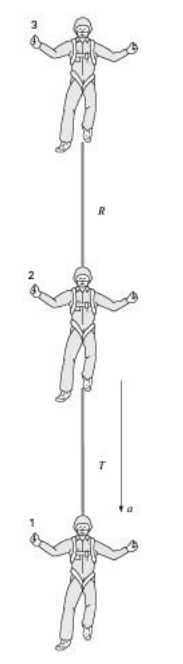

\begin{cases}
\begin{aligned}
m_1g - c_1v -T &= m_1a \\
m_2g - c_2v +T - R &= m_2a \\
m_3g - c_3v + R &= m_3a
\end{aligned}
\end{cases}
<hr/>
$$a \rightarrow x_1, R \rightarrow x_2, T \rightarrow x_3$$

\begin{cases}
\begin{aligned}
70*9.8 - 10*5 -x_3 &= 70*x_1 \\
60*9.8 - 14*5 +x_3 - x_2 &= 60*x_1 \\
40*9.8 - 17*5 + x_2 &= 40*x_1
\end{aligned}
\end{cases}

<hr/>
\begin{cases}
\begin{aligned}
70*x_1 + x_3 &= 636\\
60*x_1 + x_2 - x_3 &= 518 \\
40*x_1 - x_2 &= 307
\end{aligned}
\end{cases}


In [ ]:
A = np.array([
    [70,0,1],
    [60,1,-1],
    [40,-1,0]
], dtype='float')
B = np.array([636,518,307], dtype='float').reshape(3,1)

a, b = gauss_jordan(A,B)
b

array([[ 8.59411765],
       [36.76470588],
       [34.41176471]])

## 7) Resolva o seguinte esquema de equações por decomposição LU:

$$8x_1 + 4x_2 - x_3 = 11$$

$$-2x_1 + 5x_2 + x_3 = 4$$

$$2x_1 - x_2 + 6x_3 = 7$$

Determine também a matriz inversa. Verifique seus resultados comprovando que
$[A].[A]^{-1}= I$

In [15]:
A = np.array([[8,4,-1], [-2,5,1], [2,-1,6]], dtype='float')
B = np.array([11,4,7], dtype='float').reshape(3,1)

l, u = lu_decomp(A)
x = solve_lu(l,u,b)
x

array([ 3.60576923, -4.40384615, -2.76923077])

In [16]:
I = np.eye(3)
i1 = I[:,0]
i2 = I[:,1]
i3 = I[:,2]
x1 = solve_lu(l,u,i1)
x2 = solve_lu(l,u,i2)
x3 = solve_lu(l,u,i3)

A_1 = np.column_stack((x1,x2,x3))
A_1

array([[ 0.09935897, -0.07371795,  0.02884615],
       [ 0.04487179,  0.16025641, -0.01923077],
       [-0.02564103,  0.05128205,  0.15384615]])

In [17]:
#A_1 = gauss_jordan_inversa(A)
A @ A_1 # = I

array([[ 1.00000000e+00,  4.16333634e-17,  0.00000000e+00],
       [ 1.04083409e-17,  1.00000000e+00,  0.00000000e+00],
       [-3.46944695e-17, -2.77555756e-17,  1.00000000e+00]])

## 8) O seguinte sistema de equações é projetado para determinar as concentrações (os c´s em g/m3) em uma série de reatores acoplados como função da quantidade de entrada de massa em cada reator (o lado direito está em g/dia),

$$15c_1 - 3c_2 - c_3 = 3800$$

$$-3c_1 + 18c_2 - 6c_3 = 1200$$

$$-4c_1 - c_2 + 12c_3 = 2350$$

In [ ]:
A = np.array([[15,-3,-1], [-3,18,-6], [-4,-1,12]], dtype='float')
B = np.array([3800, 1200, 2350], dtype='float').reshape(3,1)

### (a) Determine a matriz inversa.

In [ ]:
A_1 = gauss_jordan_inversa(A)
A_1

array([[0.07253886, 0.01278066, 0.01243523],
       [0.02072539, 0.06079447, 0.03212435],
       [0.02590674, 0.00932642, 0.09015544]])

In [ ]:
A @ A_1 # = I

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.93889390e-17, 1.00000000e+00, 8.32667268e-17],
       [2.77555756e-17, 2.77555756e-17, 1.00000000e+00]])

### (b) Use a inversa para determinar a solução.

In [ ]:
# A^-1 @ A @ X= A^-1 @ B
x = A_1 @ B # = X
x

array([[320.20725389],
       [227.20207254],
       [321.50259067]])

### (c) Determine de quanto o fluxo de entrada de massa no reator 3 deve ser aumentado para induzir um aumento de 10g/m³ na concentração do reator 1.

$-3c_2 - c_3 = - 15(c_1 + 10) + 3800$

$18c_2 - 6c_3 = 3(c_1 + 10) + 1200$

$-M_3 -c_2 + 12c_3 = 4(c_1 + 10)$

In [ ]:
c1 = x[0]
A_8c = np.array([
    [0,-3,-1],
    [0,18,-6],
    [-1,-1,12]
], dtype='float')

B = np.array([
    -15*(c1 + 10) + 3800,
    3*(c1 + 10) + 1200,
    4*(c1 + 10)
], dtype='float')

In [ ]:
a, b = gauss_elimination_pivoting(A_8c,B)
x = solve_system_ts(a,b)
x

array([3154.16666667,  253.03540587,  394.00259067])

### (d) De quanto a concentração no reator 3 será reduzida se o fluxo de entrada de massa nos reatores 1 e 2 for reduzido para 500 e 250 g/dia, respectivamente?

In [ ]:
B_new = np.array([3300, 950, 2350], dtype='float').reshape(3,1)
a, b = gauss_elimination(A,B_new)
x = solve_system_ts(a,b)
x

array([280.74265976, 201.64075993, 306.21761658])

## 9) Em cada caso abaixo:

a. Verifique se o critério de Sassenfeld é satisfeito;

b. Resolva por Gauss-Seidel, se possível:


### $$
A =
\begin{bmatrix}
10 & 1 & 1 \\
1 & 10 & 1 \\
1 & 1 & 10 \\
\end{bmatrix} ;
b =
\begin{bmatrix}
12 \\
12 \\
12 \\
\end{bmatrix}
$$

In [ ]:
A = np.array([
    [10,1,1],
    [1,10,1],
    [1,1,10]
], dtype='float')
B = np.array([12,12,12], dtype='float').reshape(3,1)

In [ ]:
sassenfeld(A)

0.2

In [ ]:
gauss_seidel(A,B)

array([[1.],
       [1.],
       [1.]])

### $$
A =
\begin{bmatrix}
4 & -1 & 0 & 0 \\
-1 & 4 & -1 & 0 \\
0 & -1 & 4 & -1 \\
0 & 0 & -1 & 4 \\
\end{bmatrix} ;
b =
\begin{bmatrix}
1 \\
1 \\
1 \\
1 \\
\end{bmatrix}
$$

In [ ]:
A = np.array([
    [4,-1,0,0],
    [-1,4,-1,0],
    [0,-1,4,-1],
    [0,0,-1,4]
], dtype='float')
B = np.array([1,1,1,1], dtype='float').reshape(4,1)

In [ ]:
sassenfeld(A)

0.328125

In [ ]:
gauss_seidel(A,B)

array([[0.36363636],
       [0.45454545],
       [0.45454545],
       [0.36363636]])